# 데이터 정제

In [3]:
import pandas as pd 
df = pd.read_csv('house_raw.csv')
print(df.head())
# 데이터 불러왔는지 확인


   housing_age  income  bedrooms  households     rooms  house_value
0           23  6.7770  0.141112    2.442244  8.103960       500000
1           49  6.0199  0.160984    2.726688  5.752412       500000
2           35  5.1155  0.249061    1.902676  3.888078       500000
3           32  4.7109  0.231383    1.913669  4.508393       500000
4           21  4.5625  0.255583    3.092664  4.667954       500000


In [4]:
print(df.describe())

        housing_age        income      bedrooms    households         rooms  \
count  17914.000000  17914.000000  17914.000000  17914.000000  17914.000000   
mean      27.307022      3.664086      0.214309      3.007667      5.370672   
std       11.297204      1.526694      0.055251      4.579534      2.332776   
min        1.000000      0.499900      0.100000      0.692308      0.846154   
25%       18.000000      2.526125      0.177544      2.467031      4.426115   
50%       28.000000      3.447800      0.204256      2.853499      5.199222   
75%       36.000000      4.583300      0.240476      3.318866      5.970848   
max       51.000000      9.905500      1.000000    599.714286    132.533333   

         house_value  
count   17914.000000  
mean   188692.620130  
std     95318.621139  
min     14999.000000  
25%    114325.000000  
50%    170800.000000  
75%    242100.000000  
max    500000.000000  


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

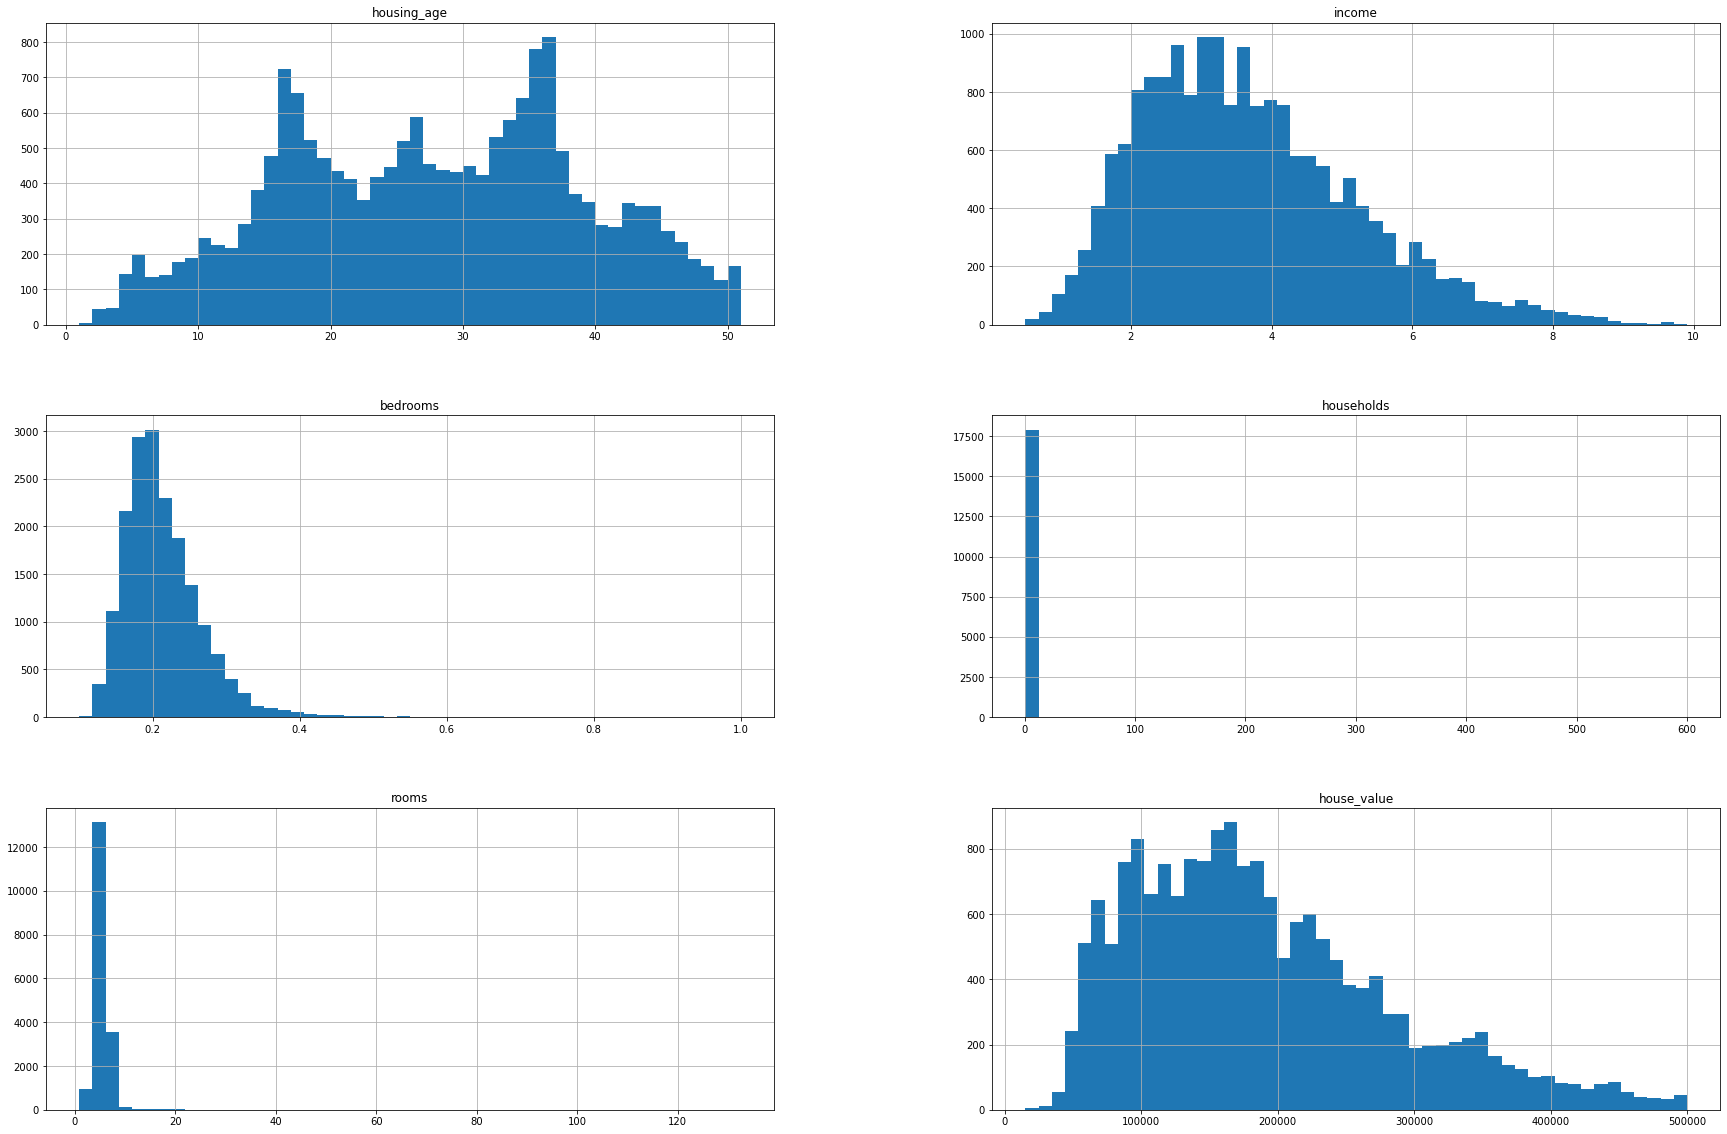

In [5]:
df.hist(bins= 50, figsize=(30,20))
# 데이터의 분포도를 보기 위해 사용

# Linear Regerssion
- No DataCleaning

In [7]:
x = df[df.columns[0:5]]
# 4번째 컬럼까지 데이터 불러오기 (총 5개)
print(x)

       housing_age  income  bedrooms  households      rooms
0               23  6.7770  0.141112    2.442244   8.103960
1               49  6.0199  0.160984    2.726688   5.752412
2               35  5.1155  0.249061    1.902676   3.888078
3               32  4.7109  0.231383    1.913669   4.508393
4               21  4.5625  0.255583    3.092664   4.667954
...            ...     ...       ...         ...        ...
17909           33  2.6750  0.246622    3.428571   4.698413
17910           39  2.3667  0.340771    1.876812   3.572464
17911           19  2.1000  0.386107    2.987805   3.774390
17912           16  1.6607  0.286275    2.236842   6.710526
17913           36  0.5360  0.285714    2.250000  12.250000

[17914 rows x 5 columns]


In [10]:
y = df[df.columns[5]]
y = df[["house_value"]]
# 타겟 데이터 설정 
print(y)

       house_value
0           500000
1           500000
2           500000
3           500000
4           500000
...            ...
17909        22500
17910        17500
17911        14999
17912        14999
17913        14999

[17914 rows x 1 columns]


In [13]:
from sklearn.model_selection import *

In [17]:
X_train, X_test, y_train,  y_test = train_test_split(x,y, random_state = 410)
print(X_train.shape)
print(y_train.shape)

(13435, 5)
(13435, 1)


In [18]:
from sklearn.preprocessing import *

In [19]:
# 스케일러 적용 
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scale_train = scaler_minmax.transform(X_train)
X_scale_test = scaler_minmax.transform(X_test)

In [20]:
print(X_scale_train)

[[0.6        0.68906821 0.05921282 0.00358116 0.04404134]
 [0.28       0.23337161 0.11436694 0.00388654 0.03531278]
 [0.66       0.36917368 0.08727118 0.00479315 0.03934749]
 ...
 [0.3        0.71824232 0.03699785 0.00441447 0.05111356]
 [0.36       0.35242834 0.11604938 0.00573308 0.03173172]
 [0.58       0.30507357 0.11067623 0.0036594  0.03512064]]


In [21]:
from sklearn.linear_model import *

In [23]:
model = LinearRegression()
model.fit(X_scale_train, y_train)

LinearRegression()

In [25]:
pred_train = model.predict(X_scale_train)
print('학습 모델 결과 : ' ,model.score(X_scale_train, y_train))

학습 모델 결과 :  0.5193686333919745


In [27]:
pred_test = model.predict(X_scale_test)
print('테스트 모델 결과 : ', model.score(X_scale_test, y_test))

테스트 모델 결과 :  0.5218384652789854


# DataCleaning

### To find attribute of bedrooms data

In [33]:
bedroom = df[df['bedrooms'] < 0.6]

<AxesSubplot:>

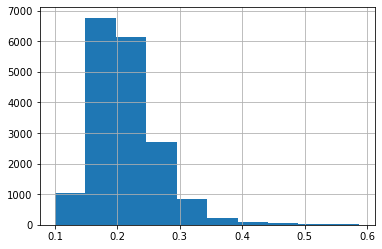

In [35]:
bedroom['bedrooms'].hist()

In [37]:
bedroom2 = df[df['bedrooms'] >= 0.6]
# bedrooms의 값이 0.6이상인 것을 이상치로 판단 
print(bedroom2['bedrooms'].value_counts())
print(bedroom2)

1.000000    3
0.602489    1
0.635258    1
0.658869    1
0.613084    1
0.662539    1
0.625887    1
0.923077    1
0.700000    1
0.627338    1
0.686114    1
0.750000    1
Name: bedrooms, dtype: int64
       housing_age  income  bedrooms  households     rooms  house_value
1732            43  1.3157  0.602489    2.133660  1.911826       333300
1911            25  1.7866  0.635258    3.566327  1.678571       325000
3162            26  1.4904  0.658869    3.750779  1.598131       275000
3165            12  1.2012  0.613084    3.271233  1.465753       275000
5446            24  1.8304  0.662539    3.973545  1.708995       225000
7674            45  1.4940  0.625887    3.673981  1.768025       187500
7677            20  1.0938  0.923077    1.739130  1.130435       187500
9658            46  2.8750  1.000000    1.846154  0.846154       162500
9716            16  0.5360  1.000000   18.444444  2.111111       162500
11810           37  2.7634  0.700000    4.524194  1.411290       137500
11827      

### To find attribute of households data

<AxesSubplot:>

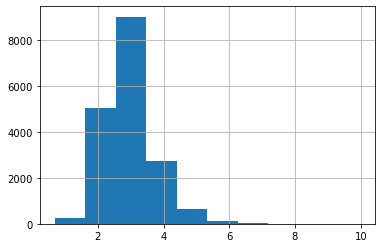

In [40]:
household = df[df['households'] < 10 ]
household['households'].hist()

In [42]:
household2 = df[df['households'] > 10] 
# households의 값이 10이상인 데이터 추출 

print(sum(household2['households'].value_counts()))
# household가 10이상인 값이 전체 데이터에서 22개 존재

22


### To find attribute of rooms data

<AxesSubplot:>

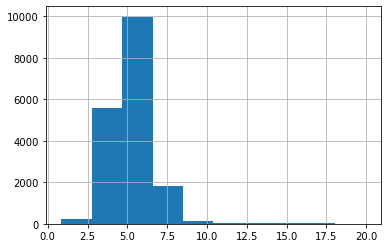

In [45]:
room = df[df['rooms'] < 20]
room['rooms'].hist()
# 대부분의 rooms 데이터는 20미만에 존재 

In [47]:
room2 = df[df['rooms'] >= 20]
print(sum(room2['rooms'].value_counts()))

64


### Create cleaning dataset

In [49]:
final_data = df[(df['bedrooms'] < 0.5) & (df['households'] < 7) & (df['rooms'] < 12)]
final_data
# 앞서 EDA를 통해 데이터들의 특성을 파악하고 성능을 올리기 위해 데이터마다 조건을 걸어 최종 데이터셋 생성

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000
...,...,...,...,...,...,...
17907,34,2.3013,0.214583,2.748299,4.897959,26600
17909,33,2.6750,0.246622,3.428571,4.698413,22500
17910,39,2.3667,0.340771,1.876812,3.572464,17500
17911,19,2.1000,0.386107,2.987805,3.774390,14999


In [50]:
print(final_data.describe())

        housing_age        income      bedrooms    households         rooms  \
count  17689.000000  17689.000000  17689.000000  17689.000000  17689.000000   
mean      27.378823      3.671141      0.213278      2.952117      5.244001   
std       11.280230      1.525937      0.051167      0.731573      1.184922   
min        1.000000      0.499900      0.100000      0.750000      1.640000   
25%       18.000000      2.532900      0.177464      2.470270      4.426829   
50%       28.000000      3.453900      0.204104      2.854962      5.190779   
75%       36.000000      4.591800      0.240157      3.316092      5.953728   
max       51.000000      9.905500      0.498127      6.954023     11.901869   

         house_value  
count   17689.000000  
mean   189043.439313  
std     95487.122628  
min     14999.000000  
25%    114400.000000  
50%    171100.000000  
75%    242700.000000  
max    500000.000000  


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

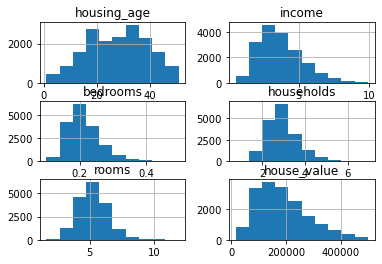

In [51]:
final_data.hist()

In [53]:
X = final_data[final_data.columns[0:5]]
y = final_data["house_value"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 410)

In [55]:
print(X_train.shape)
print(y_train.shape)

(13266, 5)
(13266,)


In [56]:
# 데이터 정규화 
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)

MinMaxScaler()

In [64]:
X_train_scale = scaler_minmax.transform(X_train)
X_test_scale = scaler_minmax.transform(X_test)

/Users/sig6774/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [65]:
print(X_train_scale)

[[0.4        0.22398358 0.25368454 0.51880444 0.40444498]
 [0.74       0.13914051 0.54680301 0.59402156 0.18125353]
 [0.4        0.3527473  0.30596105 0.32476437 0.34108236]
 ...
 [0.68       0.46828485 0.25714016 0.2978121  0.37441995]
 [0.36       0.27948244 0.24888556 0.22072184 0.35043073]
 [0.28       0.30715744 0.21961591 0.34685538 0.43412527]]


In [67]:
model = LinearRegression()
model.fit(X_train_scale, y_train)

LinearRegression()

In [68]:
pred_train = model.predict(X_scale)
print("훈련 데이터 정확도 : ", model.score(X_train_scale, y_train))

훈련 데이터 정확도 :  0.5719629541205414


In [72]:
pred_test = model.predict(X_test_scale)
print("테스트 데이터 정확도 : ", model.score(X_test_scale, y_test))

테스트 데이터 정확도 :  -2.2053922863710644


In [73]:
# 데이터 저장 
final_data.to_csv('Chap7_CleaningData.csv', index = False)